In [1]:
import numpy as np
import pandas as pd

In [2]:
root1 = r'C:\Users\aidag\OneDrive\Escritorio\ironhack\final_project\suicide_rates_1990-2022.csv'
root2 = r'C:\Users\aidag\OneDrive\Escritorio\ironhack\final_project\age_std_suicide_rates_1990-2022.csv'

df1 = pd.read_csv(root1)
df2 = pd.read_csv(root2)

suicide_dataframe = pd.concat([df1, df2])
suicide_dataframe.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio,StdDeathRate,GNI
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315,NaN,NaN
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315,NaN,NaN
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315,NaN,NaN
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315,NaN,NaN
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315,NaN,NaN


## Data info and cleaning

In [3]:
suicide_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124488 entries, 0 to 5927
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    124488 non-null  object 
 1   RegionName                    124488 non-null  object 
 2   CountryCode                   124488 non-null  object 
 3   CountryName                   124488 non-null  object 
 4   Year                          124488 non-null  int64  
 5   Sex                           124488 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  124024 non-null  float64
 9   CauseSpecificDeathPercentage  120198 non-null  float64
 10  DeathRatePer100K              113616 non-null  float64
 11  Population                    118272 non-null  float64
 12  GDP                           116886 non-null  floa

In [4]:
suicide_dataframe.isna().sum().sum()

340773

In [5]:
suicide_dataframe.isna().sum()

RegionCode                           0
RegionName                           0
CountryCode                          0
CountryName                          0
Year                                 0
Sex                                  0
AgeGroup                          5928
Generation                        5928
SuicideCount                       464
CauseSpecificDeathPercentage      4290
DeathRatePer100K                 10872
Population                        6216
GDP                               7602
GDPPerCapita                      7602
GrossNationalIncome              15888
GNIPerCapita                     11298
InflationRate                    15183
EmploymentPopulationRatio        11676
StdDeathRate                    118768
GNI                             119058
dtype: int64

In [4]:
columns_to_delete = ['StdDeathRate', 'GNI', 'DeathRatePer100K']
suicide_dataframe = suicide_dataframe.drop(columns_to_delete, axis=1)

In [7]:
suicide_dataframe.dtypes

RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                              int64
Sex                              object
AgeGroup                         object
Generation                       object
SuicideCount                    float64
CauseSpecificDeathPercentage    float64
Population                      float64
GDP                             float64
GDPPerCapita                    float64
GrossNationalIncome             float64
GNIPerCapita                    float64
InflationRate                   float64
EmploymentPopulationRatio       float64
dtype: object

In [5]:
numerical_data = suicide_dataframe.select_dtypes(include=['float64', 'int64'])
categorical_data = suicide_dataframe.select_dtypes(include='object')

In [9]:
numerical_data.columns

Index(['Year', 'SuicideCount', 'CauseSpecificDeathPercentage', 'Population',
       'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio'],
      dtype='object')

In [6]:
stv = suicide_dataframe[["SuicideCount", "CauseSpecificDeathPercentage", "Population", "GDP", "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"]].mean()

suicide_dataframe[["SuicideCount", "CauseSpecificDeathPercentage", "Population", "GDP", "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"]] = suicide_dataframe[["SuicideCount", "CauseSpecificDeathPercentage", "Population", "GDP", "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"]].fillna(stv)

In [11]:
suicide_dataframe.isna().sum()

RegionCode                         0
RegionName                         0
CountryCode                        0
CountryName                        0
Year                               0
Sex                                0
AgeGroup                        5928
Generation                      5928
SuicideCount                       0
CauseSpecificDeathPercentage       0
Population                         0
GDP                                0
GDPPerCapita                       0
GrossNationalIncome                0
GNIPerCapita                       0
InflationRate                      0
EmploymentPopulationRatio          0
dtype: int64

In [12]:
suicide_dataframe["AgeGroup"].unique()

array(['0-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years', 'Unknown', nan], dtype=object)

In [13]:
suicide_dataframe["Generation"].unique()

array(['Generation Alpha', 'Generation Z', 'Millennials', 'Generation X',
       'Baby Boomers', 'Silent Generation', 'Unknown', nan], dtype=object)

In [9]:
suicide_dataframe['Generation'] = suicide_dataframe['Generation'].fillna('No info')
suicide_dataframe['AgeGroup'] = suicide_dataframe['AgeGroup'].fillna('No age info')

In [8]:
suicide_dataframe.shape

(124488, 17)

## EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

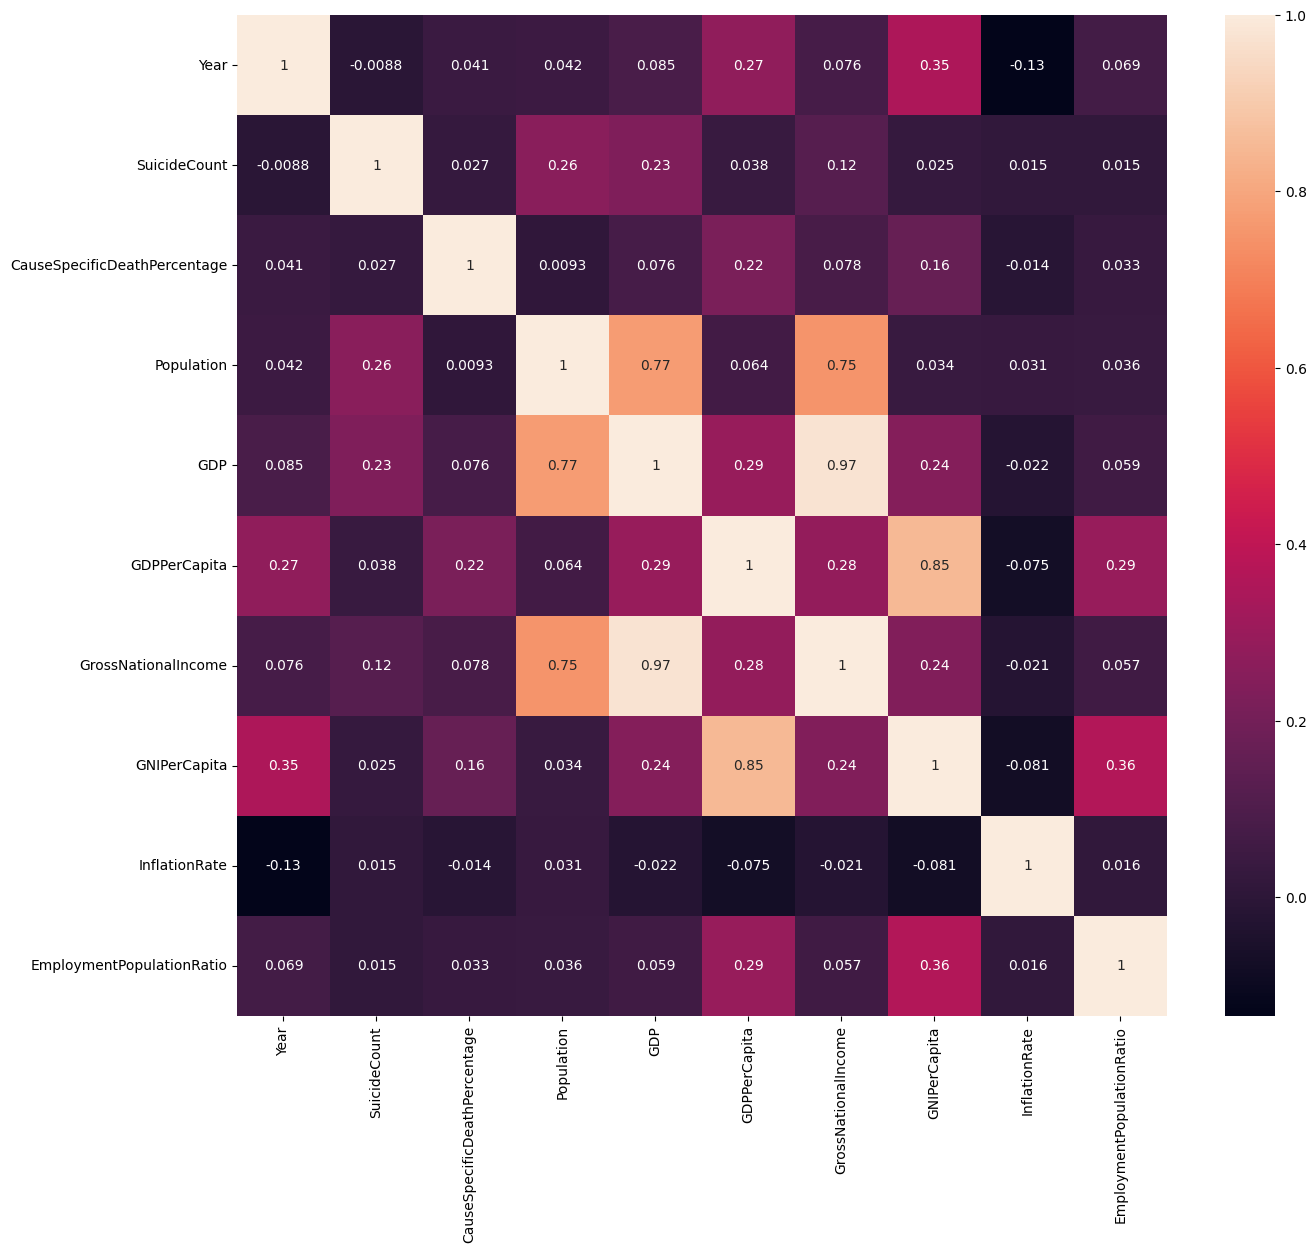

In [17]:
corr_matrix=suicide_dataframe.select_dtypes("number").corr(method='pearson')  

fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
suicide_dataframe.drop(columns=['GDP'], inplace=True)

#### I will focus this study in Spain

In [19]:
list(suicide_dataframe.columns)

['RegionCode',
 'RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'CauseSpecificDeathPercentage',
 'Population',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']

In [20]:
suicide_dataframe['CountryName'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bahamas', 'Antigua and Barbuda',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Republic of Korea', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Martinique', 'Mauritius',
       'Mayotte', 'Mexico', 'Republic of Moldova', 'Montenegro',
       'Neth

In [11]:
spanish_dataframe = suicide_dataframe[suicide_dataframe['CountryName'] == 'Spain']
columns_to_drop = ['RegionCode', 'RegionName', 'CountryCode', 'CountryCode', 'CountryName']
spanish_dataframe = spanish_dataframe.drop(columns=columns_to_drop)

suicide_dataframe.drop(columns=['CountryCode', 'RegionCode'], inplace=True)

In [12]:
europe_dataframe = suicide_dataframe[suicide_dataframe['RegionName'] == 'Europe']

In [13]:
spanish_dataframe = spanish_dataframe[3:]
spanish_dataframe.head()

,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
78363,1990,Male,0-14 years,Generation Alpha,19.0,4.000000,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
78364,1990,Male,15-24 years,Generation Z,82.0,5.131414,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
78365,1990,Male,15-24 years,Generation Z,158.0,5.987116,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
78366,1990,Male,25-34 years,Millennials,185.0,6.357388,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
78367,1990,Male,25-34 years,Millennials,140.0,5.177515,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811


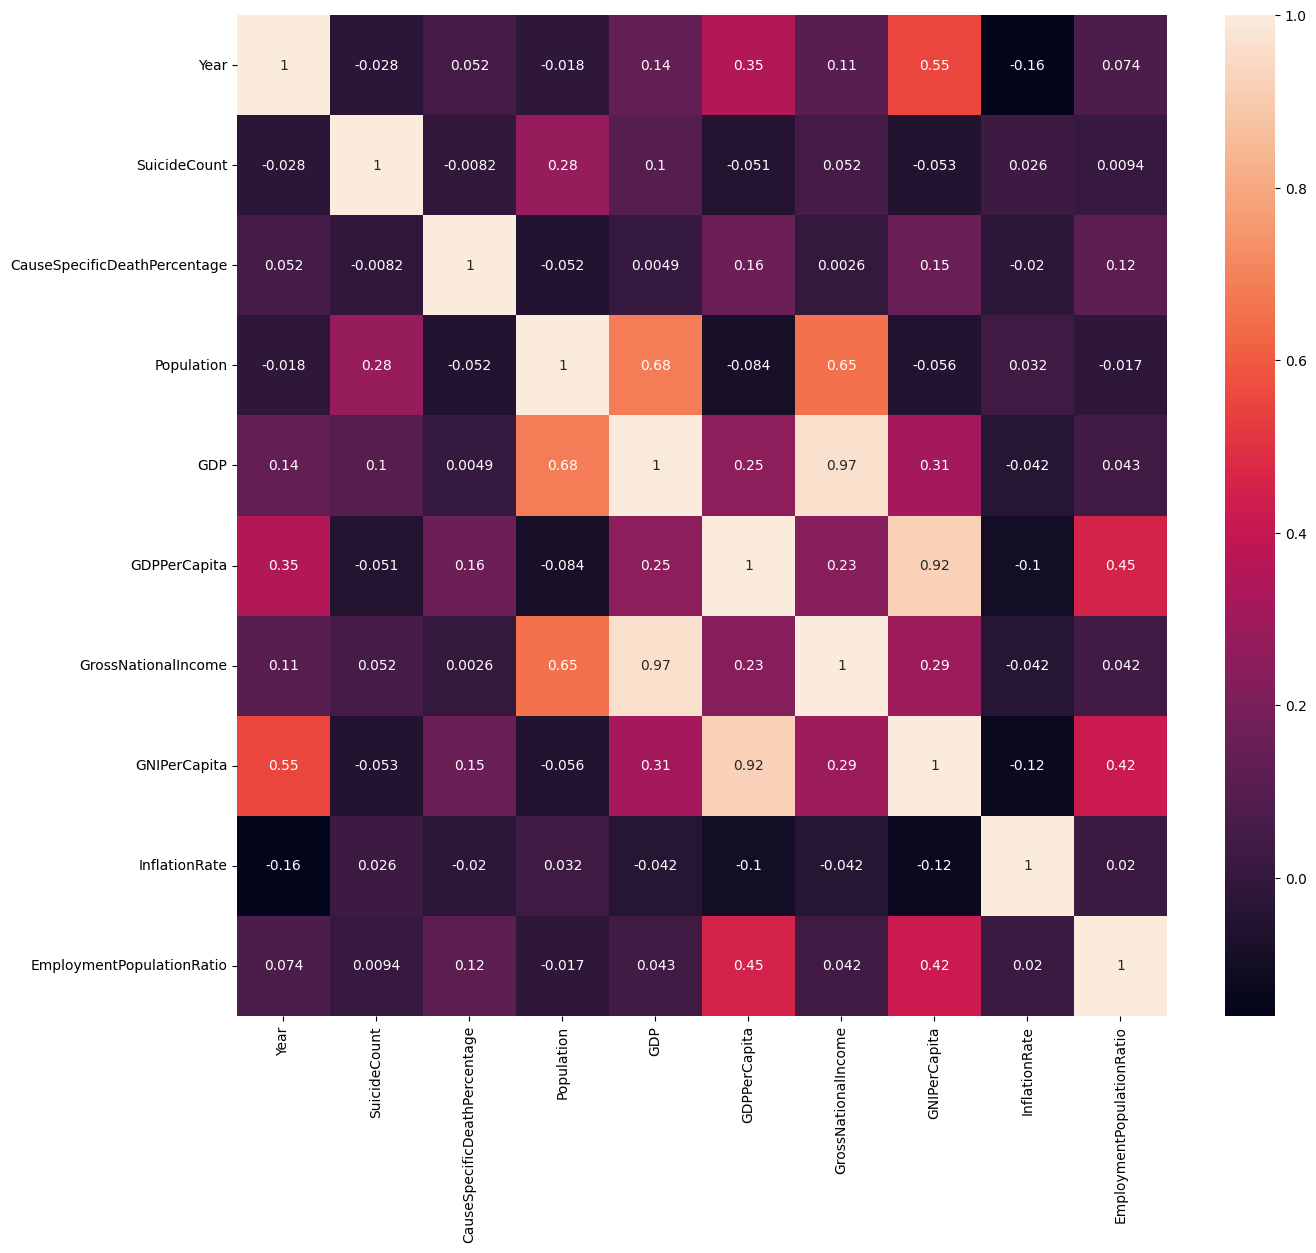

In [14]:
corr_matrix = europe_dataframe.select_dtypes("number").corr(method='pearson')  

fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

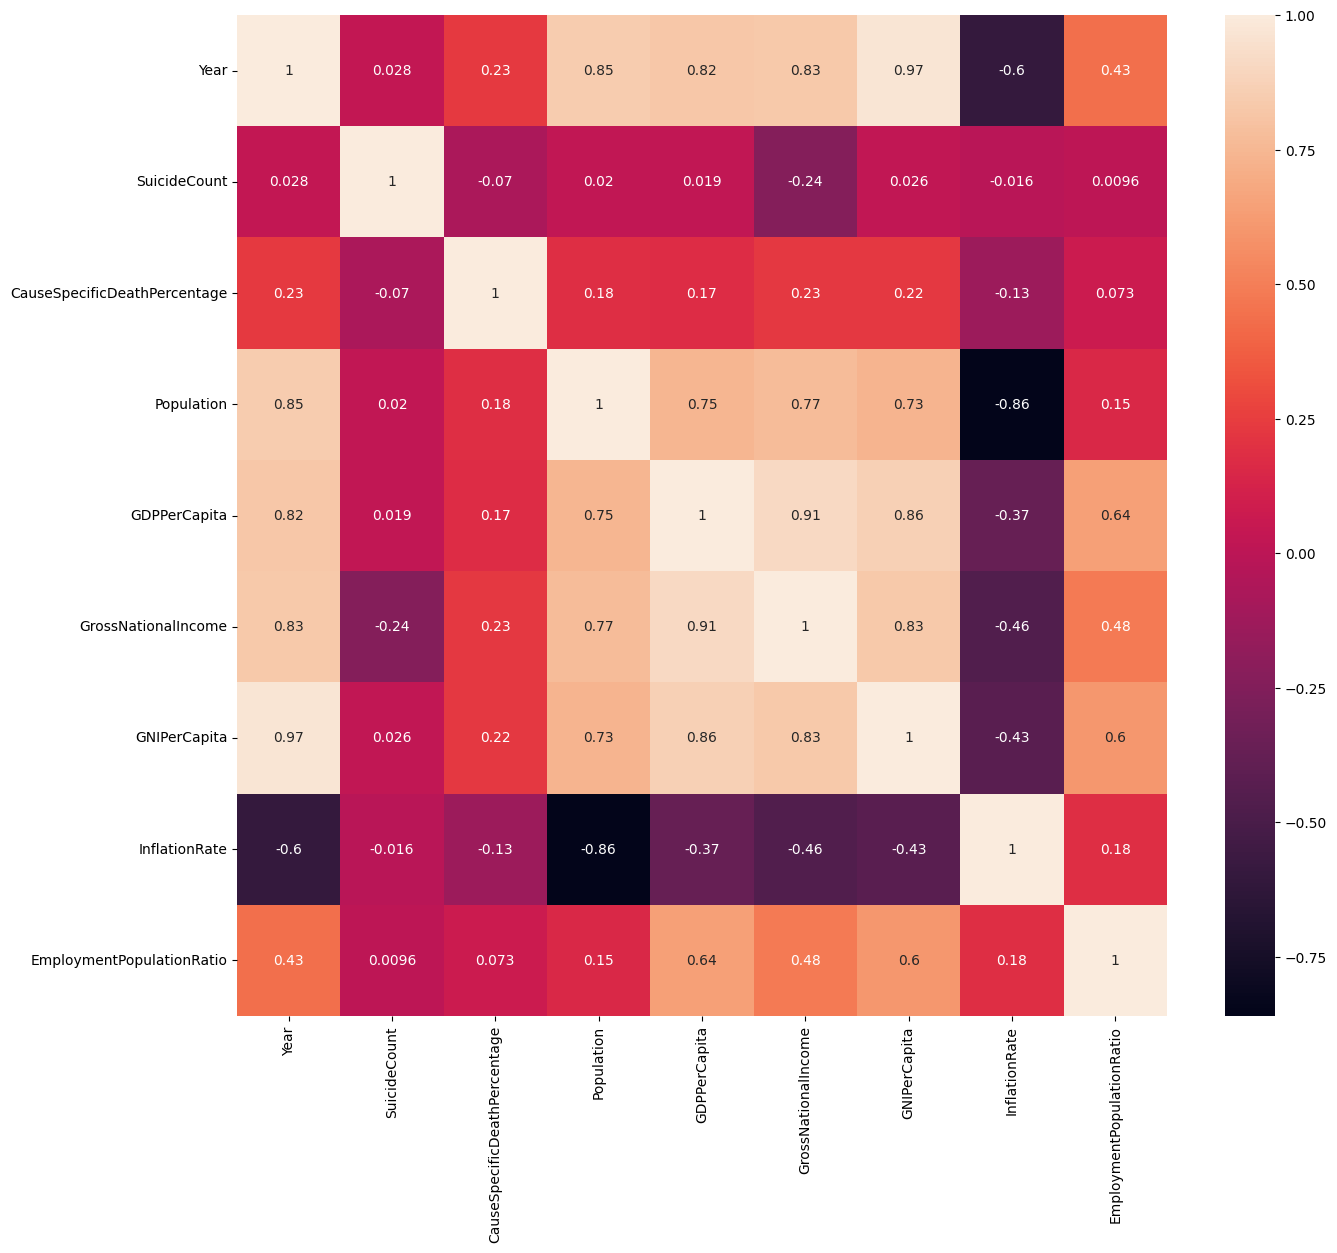

In [25]:
corr_matrix = spanish_dataframe.select_dtypes("number").corr(method='pearson')  

fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
spanish_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1341.0,2.005535e+03,9.217668e+00,1.990000e+03,1.998000e+03,2.006000e+03,2.014000e+03,2.021000e+03
SuicideCount,1341.0,1.619642e+02,4.014906e+02,0.000000e+00,1.800000e+01,6.400000e+01,1.640000e+02,2.982000e+03
CauseSpecificDeathPercentage,1341.0,3.546500e+00,4.375636e+00,0.000000e+00,4.416298e-01,1.575456e+00,4.903678e+00,2.091954e+01
Population,1341.0,4.306823e+07,4.442293e+06,2.456184e+07,4.022351e+07,4.439732e+07,4.659324e+07,4.741579e+07
GDPPerCapita,1341.0,2.339765e+04,7.089586e+03,1.333991e+04,1.547196e+04,2.642915e+04,2.958152e+04,3.551072e+04
GrossNationalIncome,1341.0,9.968230e+11,3.826151e+11,4.976795e+11,6.208450e+11,1.131110e+12,1.362930e+12,1.509570e+12
GNIPerCapita,1341.0,2.743046e+04,8.720081e+03,1.431000e+04,1.885000e+04,3.015000e+04,3.342000e+04,4.319000e+04
InflationRate,1341.0,3.102408e+00,3.426667e+00,-5.003657e-01,1.674981e+00,3.038888e+00,3.558846e+00,2.028646e+01
EmploymentPopulationRatio,1341.0,4.609929e+01,4.561760e+00,3.797400e+01,4.166400e+01,4.665400e+01,4.877600e+01,5.575081e+01


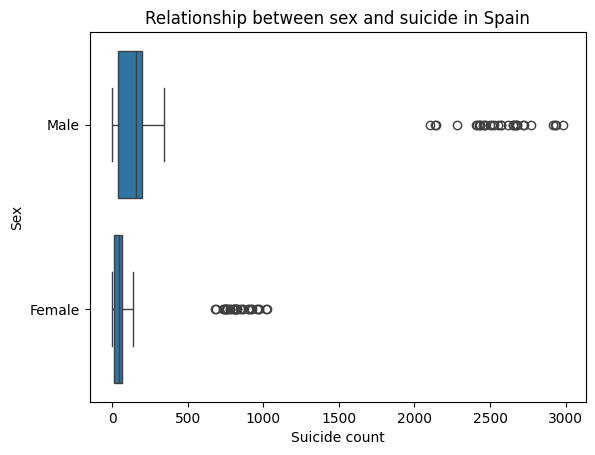

In [27]:
sns.boxplot(x="SuicideCount", y="Sex", data=spanish_dataframe) 

plt.title('Relationship between sex and suicide in Spain')
plt.xlabel('Suicide count')
plt.ylabel('Sex')

plt.show()

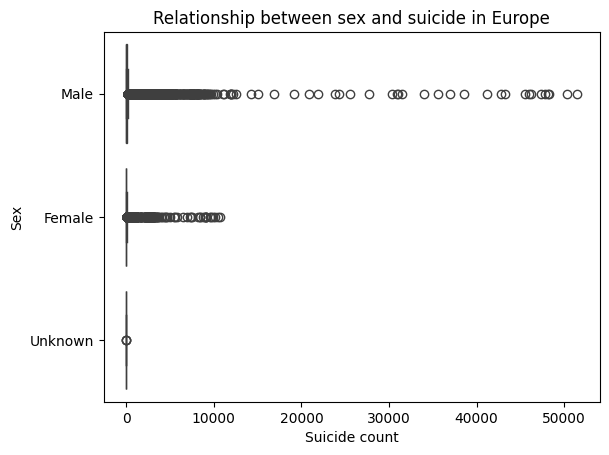

In [28]:
sns.boxplot(x="SuicideCount", y="Sex", data=europe_dataframe)

plt.title('Relationship between sex and suicide in Europe')
plt.xlabel('Suicide count')
plt.ylabel('Sex')

plt.show()

Spanish suicide boxplot: displays more variability in male than female, compared with the european dataframe women has less than a half of variability with european womans, also man have more dispersion than woman. Men have extreme values and have lot of outliers.

European suicide boxplot: displays more variability in male data than female data, which means that in male, are more different values than in woman. Also tendency higher in men than in woman. Variability is also proportional

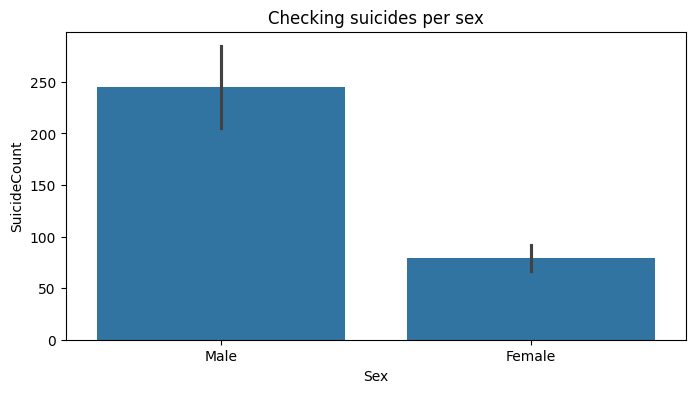

In [29]:
plt.figure(figsize=(8, 4)) 
barplot = sns.barplot(y='SuicideCount', x='Sex', data=spanish_dataframe)
barplot.set_xticklabels(barplot.get_xticklabels())  

plt.title('Checking suicides per sex')
plt.xlabel('Sex')
plt.ylabel('SuicideCount')

plt.show()

Generation X has the highest suicide amount:

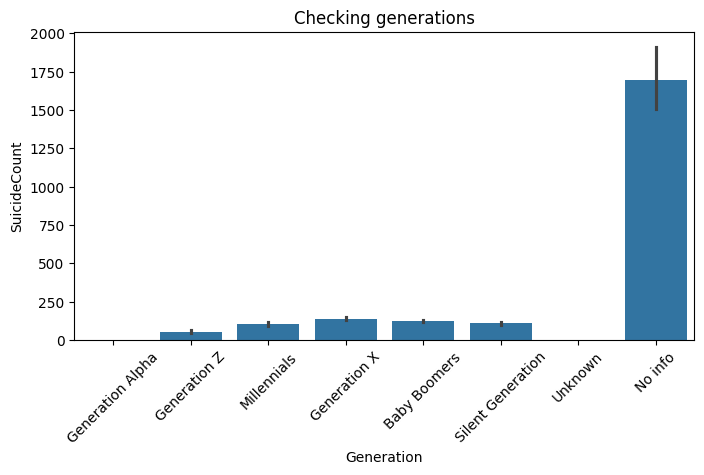

In [30]:
plt.figure(figsize=(8, 4)) 
barplot = sns.barplot(y='SuicideCount', x='Generation', data=spanish_dataframe)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 45)  

plt.title('Checking generations')
plt.xlabel('Generation')
plt.ylabel('SuicideCount')

plt.show()

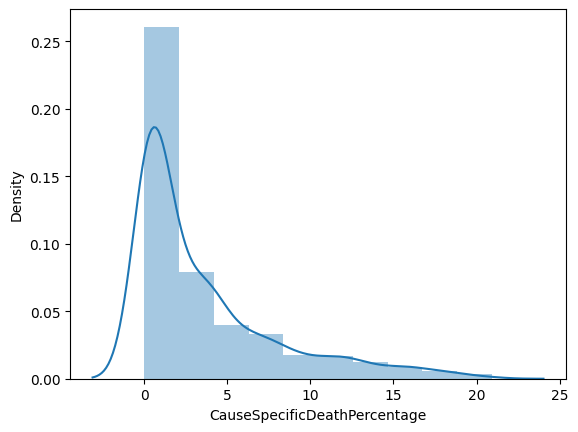

In [31]:
sns.distplot(spanish_dataframe['CauseSpecificDeathPercentage'], bins=10)

plt.show()

This barplot displays that some kinds of suicide causes are more relevant tham others, let's see what happens including sex:

In [32]:
spanish_dataframe['CauseSpecificDeathPercentage'].unique()

array([4.        , 5.13141427, 5.98711633, ..., 0.46641196, 1.20772264,
       0.51418814])

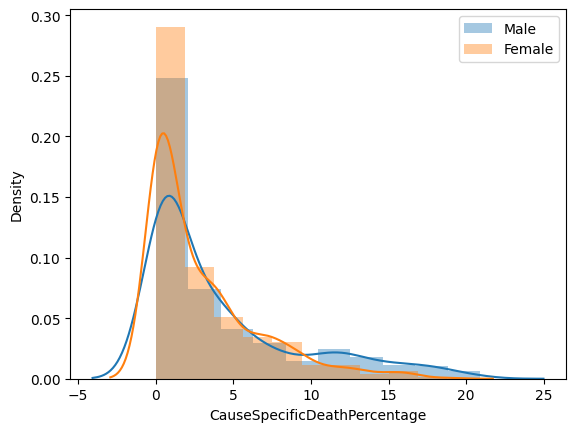

In [33]:
sns.distplot(spanish_dataframe[spanish_dataframe['Sex'] == 'Male']['CauseSpecificDeathPercentage'], bins=10, label='Male')
sns.distplot(spanish_dataframe[spanish_dataframe['Sex'] == 'Female']['CauseSpecificDeathPercentage'], bins=10, label='Female')
plt.legend()
plt.show()

Suicides per european country:

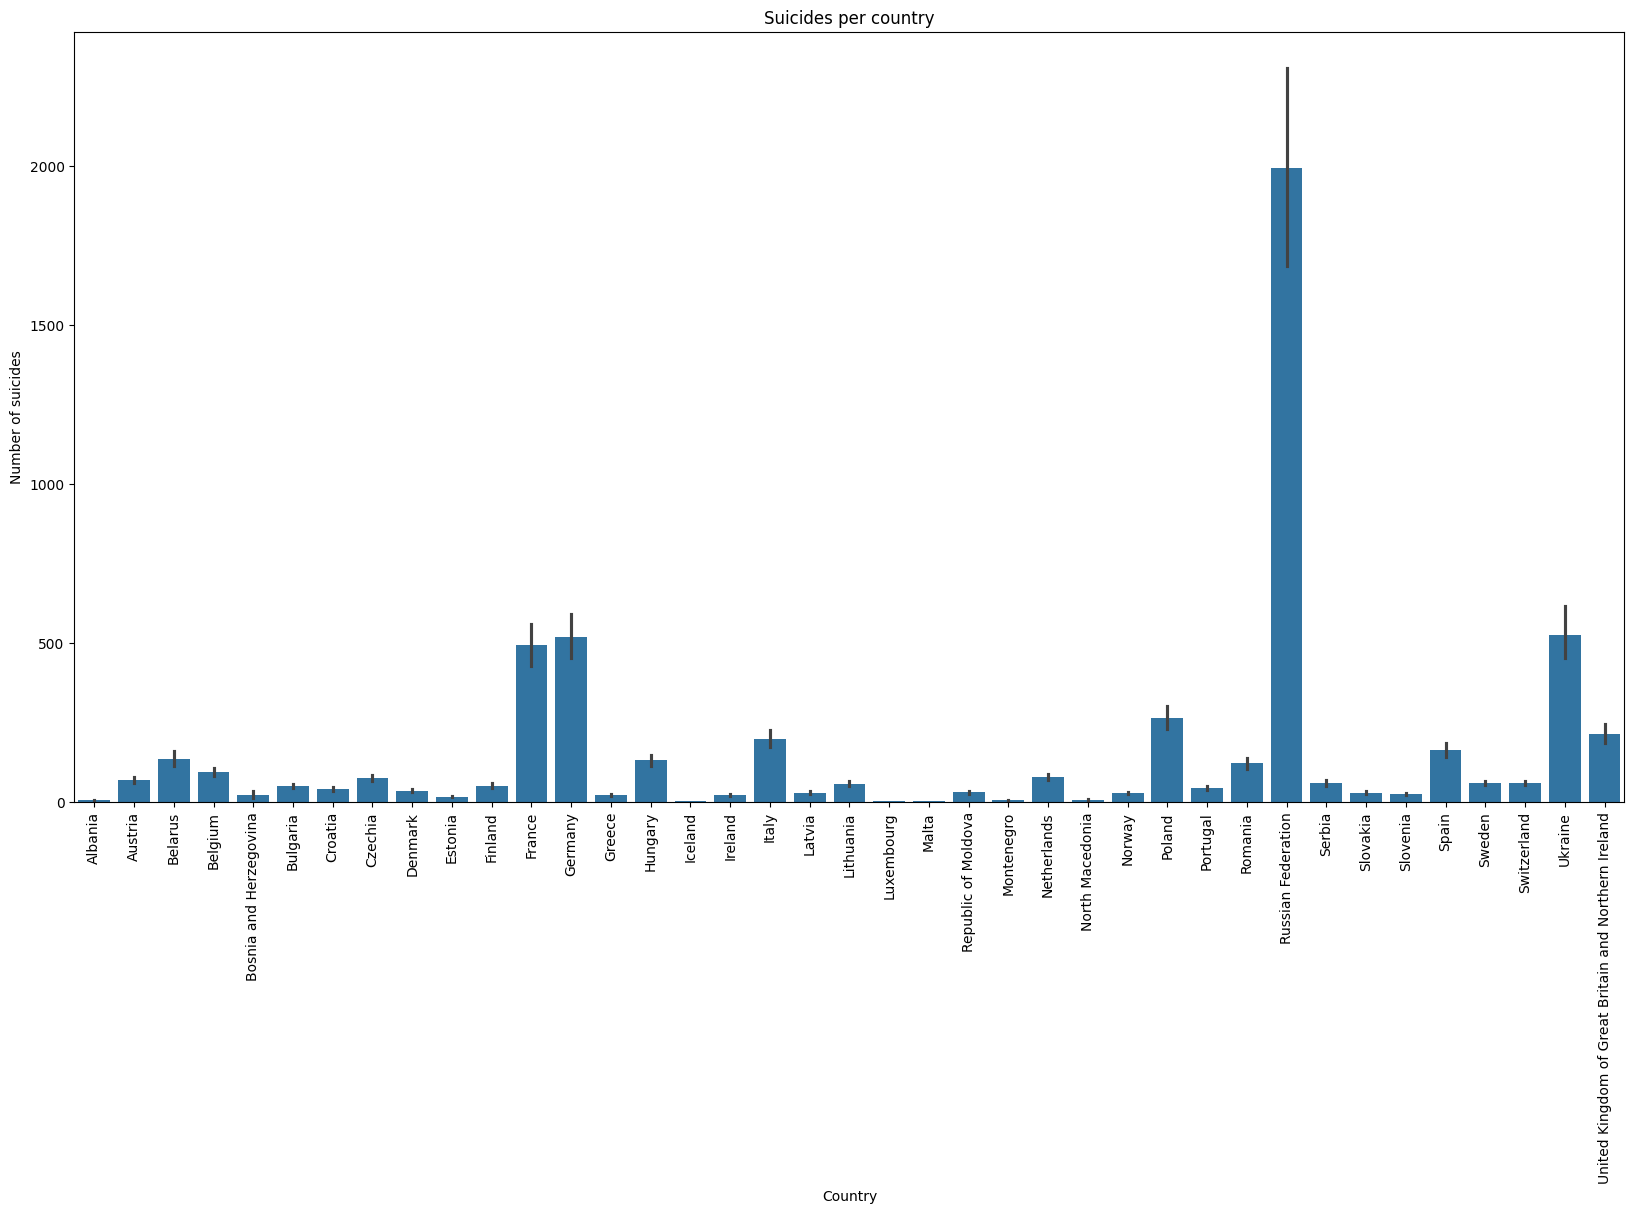

In [34]:
plt.figure(figsize=(20, 10)) 
barplot = sns.barplot(x='CountryName', y='SuicideCount', data=europe_dataframe)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)  

plt.title('Suicides per country')
plt.xlabel('Country')
plt.ylabel('Number of suicides')

plt.show()

Some causes as we saw in the barlot are more relevant than others, and the lack employment too:

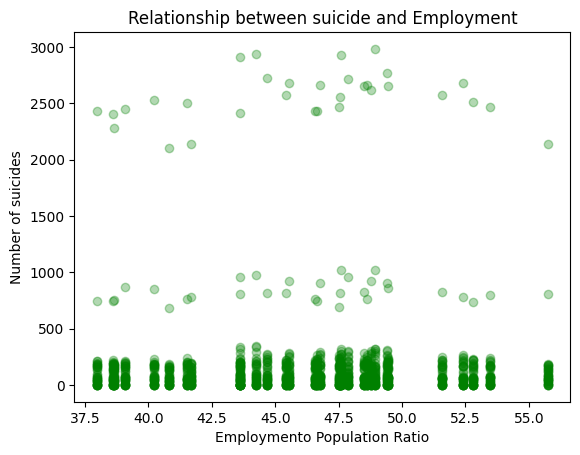

In [35]:
plt.scatter(spanish_dataframe['EmploymentPopulationRatio'], spanish_dataframe['SuicideCount'], alpha=0.3, color='green')

plt.title('Relationship between suicide and Employment')
plt.xlabel('Employmento Population Ratio')
plt.ylabel('Number of suicides')

plt.show()

Suicide most of cases is an economic cause:

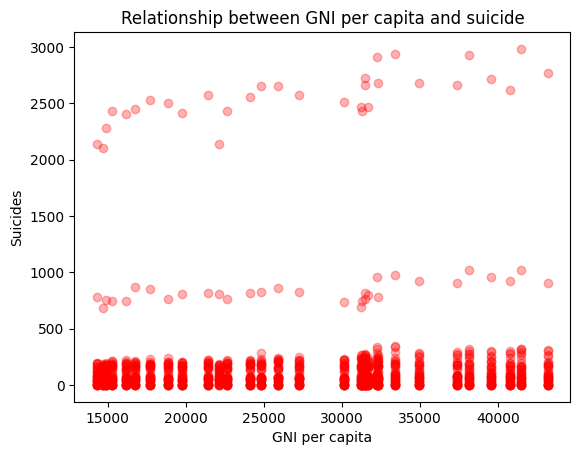

In [36]:
plt.scatter(spanish_dataframe['GNIPerCapita'], spanish_dataframe['SuicideCount'], alpha=0.3, color='red')

plt.title('Relationship between GNI per capita and suicide')
plt.xlabel('GNI per capita')
plt.ylabel('Suicides')

plt.show()

## Model

#### Tendencies suicide prediction

As we have seen in the heatmap there is very little linearity between the target variable and the rest of the features, I also made scatter plots that i discarded with not linear appearance, so I will use a random forest, it is too complex and lots of columns, i wont use a linear regression model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
numerical_data_ESP = spanish_dataframe.select_dtypes(include=['float64', 'int64'])
categorical_data_ESP = spanish_dataframe.select_dtypes(include='object')

In [17]:
df_encoded = pd.get_dummies(categorical_data_ESP, drop_first = True)  #enconding categorical variables

df_encoded = df_encoded.astype(int)  #Not interested in true and false in columns, converting them in 0/1

df_for_prediction = pd.concat([numerical_data_ESP, df_encoded], axis=1) #whole dataset for predictions
df_for_prediction.head(10)

,Year,SuicideCount,CauseSpecificDeathPercentage,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio,...,AgeGroup_75+ years,AgeGroup_No age info,AgeGroup_Unknown,Generation_Generation Alpha,Generation_Generation X,Generation_Generation Z,Generation_Millennials,Generation_No info,Generation_Silent Generation,Generation_Unknown
78363,1990,19.0,4.000000,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,1,0,0,0,0,0,0
78364,1990,82.0,5.131414,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,0,1,0,0,0,0
78365,1990,158.0,5.987116,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,0,1,0,0,0,0
78366,1990,185.0,6.357388,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,0,0,1,0,0,0
78367,1990,140.0,5.177515,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,0,0,1,0,0,0
78368,1990,120.0,4.807692,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,1,0,0,0,0,0
78369,1990,114.0,3.415219,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,1,0,0,0,0,0
78370,1990,117.0,2.692750,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,1,0,0,0,0,0
78371,1990,130.0,2.027132,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,1,0,0,0,0,0
78372,1990,174.0,1.599853,2.456184e+07,4.883376e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811,...,0,0,0,0,0,0,0,0,0,0


In [40]:
columns = list(df_for_prediction.columns)
columns

['Year',
 'SuicideCount',
 'CauseSpecificDeathPercentage',
 'Population',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio',
 'Sex_Male',
 'AgeGroup_15-24 years',
 'AgeGroup_25-34 years',
 'AgeGroup_35-54 years',
 'AgeGroup_55-74 years',
 'AgeGroup_75+ years',
 'AgeGroup_No age info',
 'AgeGroup_Unknown',
 'Generation_Generation Alpha',
 'Generation_Generation X',
 'Generation_Generation Z',
 'Generation_Millennials',
 'Generation_No info',
 'Generation_Silent Generation',
 'Generation_Unknown']

In [18]:
df_for_prediction.rename(columns={'Sex_Male': 'Sex'}, inplace=True)

In [19]:
X = df_for_prediction.drop(columns=['SuicideCount'])  # Features, i don't need there the target
y = df_for_prediction['SuicideCount']  # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(criterion='friedman_mse', max_depth=None, random_state=42, bootstrap=True, n_jobs=-1)
model.fit(X_train, y_train)model.score(X_test, y_test)

0.9966222413255151

As I have no data further back in time than 2022 in this dataset I have decided to use "Exponential Smoothing": This technique uses a smoothing model to estimate the trend and seasonality in the historical data and then project it into the future.

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [22]:
model = ExponentialSmoothing(df_for_prediction['SuicideCount'], trend='additive', seasonal=None)
fitted_model = model.fit()

In [51]:
#Last information
last_row = df_for_prediction.iloc[-1]

X_new = last_row.drop('SuicideCount')


prediction_2022 = fitted_model.forecast(steps=12).sum()

print("SuicideCount spanish prediction for 2022 in the dataset:", prediction_2022)

SuicideCount spanish prediction for 2022 in the dataset: 21985.053271736968


In [55]:
prediction_2023_ = fitted_model.forecast(steps=24).sum()  # adding total deaths per month
prediction_2023 = prediction_2023_ - prediction_2022
print("Spanish suicide prediction for 2023:", prediction_2023)

Spanish suicide prediction for 2023: 23308.317969017862


This is as close as I can get for a prediction of results in 2024:

In [53]:
previous_years = prediction_2022 + prediction_2023

In [54]:
prediction_2024_ = fitted_model.forecast(steps=36).sum()  
prediction_2024 = prediction_2024_ - previous_years
print("Spanish suicide prediction for 2024:", prediction_2024)

Spanish suicide prediction for 2024: 24631.582666298767


Seems that suicide in Spain will increase 

#### Checking employment importance with feature Importance Analysis

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

sex_importance = importance_df.loc[importance_df['Feature'] == 'EmploymentPopulationRatio', 'Importance'].values[0]

print("Importance of emplyment:", sex_importance)

                        Feature  Importance
1  CauseSpecificDeathPercentage    0.408936
9                           Sex    0.051102
3                           GDP    0.050642
8     EmploymentPopulationRatio    0.050497
7                 InflationRate    0.049710
6                  GNIPerCapita    0.048672
0                          Year    0.048524
4                  GDPPerCapita    0.048308
2                    Population    0.047116
5           GrossNationalIncome    0.046473
Importance of emplyment: 0.05049707379027276


‘DeathRatePer100K’ and ‘CauseSpecificDeathPercentage’ are the two most important features, with importance values of around 23% each. This suggests that the rate of deaths per 100,000 population and the percentage of deaths caused by a specific cause are the main drivers of the model's predictions.
Characteristics such as GDP per capita, the inflation rate and the employment share of the population also have some importance in the model, but to a lesser extent than the first two characteristics mentioned.

Among the features considered, ‘EmploymentPopulationRatio’ ranks in the middle in terms of importance. This indicates that this population employment ratio has some influence on the model's predictions, but it is not as influential as other main features such as ‘DeathRatePer100K’ and ‘CauseSpecificDeathPercentage’.

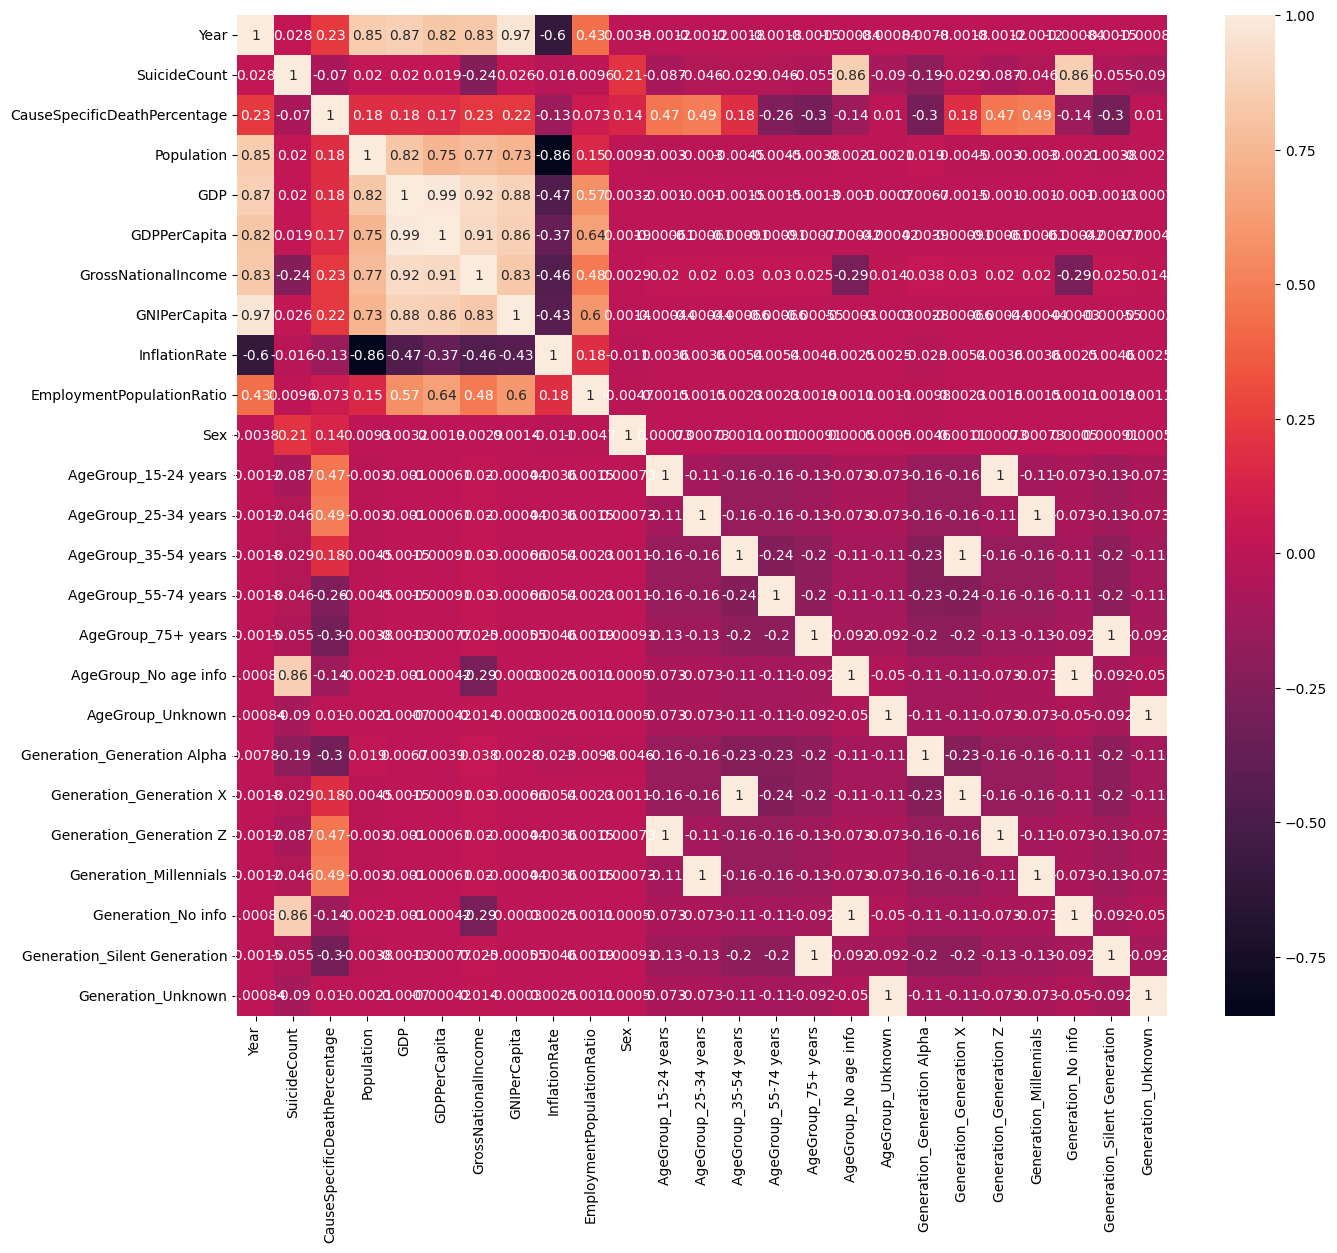

In [27]:
corr_matrix=df_for_prediction.select_dtypes("number").corr(method='pearson')  

fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
!pip install prophet

In [30]:
from prophet import Prophet

In [31]:
df_prophet = df_for_prediction.copy()

In [32]:
df_prophet['ds'] = pd.to_datetime(df_prophet['Year'], format='%Y')

In [33]:
df_prophet.rename(columns={'SuicideCount': 'y'}, inplace=True)

In [34]:
m = Prophet()
m.fit(df_prophet)

18:11:05 - cmdstanpy - INFO - Chain [1] start processing
18:11:05 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
df_prophet['ds']

78363   1990-01-01
78364   1990-01-01
78365   1990-01-01
78366   1990-01-01
78367   1990-01-01
           ...    
1870    2020-01-01
1871    2021-01-01
1872    2021-01-01
5880    1990-01-01
5881    1990-01-01
Name: ds, Length: 1341, dtype: datetime64[ns]

Last created dates:

In [36]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
392,2021-12-28
393,2021-12-29
394,2021-12-30
395,2021-12-31
396,2022-01-01


ds: this column contains dates about those predictions 

yhat: predicted values

yhat_lower: The column containing the lower bounds of the confidence intervals of the predictions.

yhat_upper: The column containing the upper bounds of the confidence intervals of the predictions.

In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
392,2021-12-28,159.252758,-371.684471,669.428414
393,2021-12-29,166.314867,-318.094386,717.557737
394,2021-12-30,172.329918,-346.718851,689.185042
395,2021-12-31,177.181461,-325.038883,686.638621
396,2022-01-01,180.775224,-329.268588,694.772197


This blue line displays a general trend during those years, and seems that values are gradully encreasing, despite this, green shadow is wide, could be uncertain but previous random forespredictions confirm that suicide is increasing so i won't consifer the wideness of this shadow.

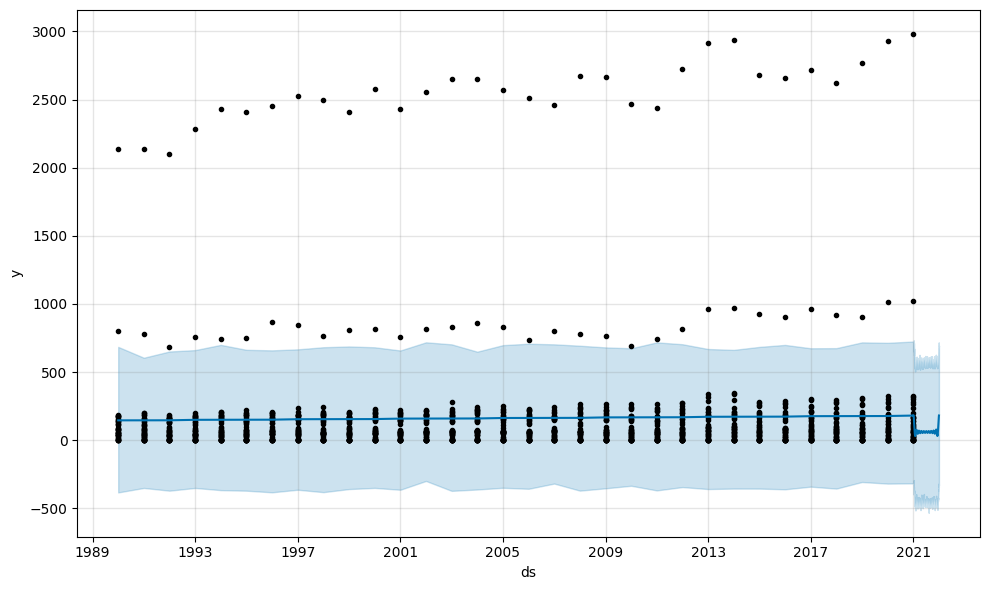

In [38]:
fig1 = m.plot(forecast)

Another graph that confirms the increase of suicides in spain, we can also observe that there are peaks where it increases and decreases (not taking into account the month of January due to the default conversion).

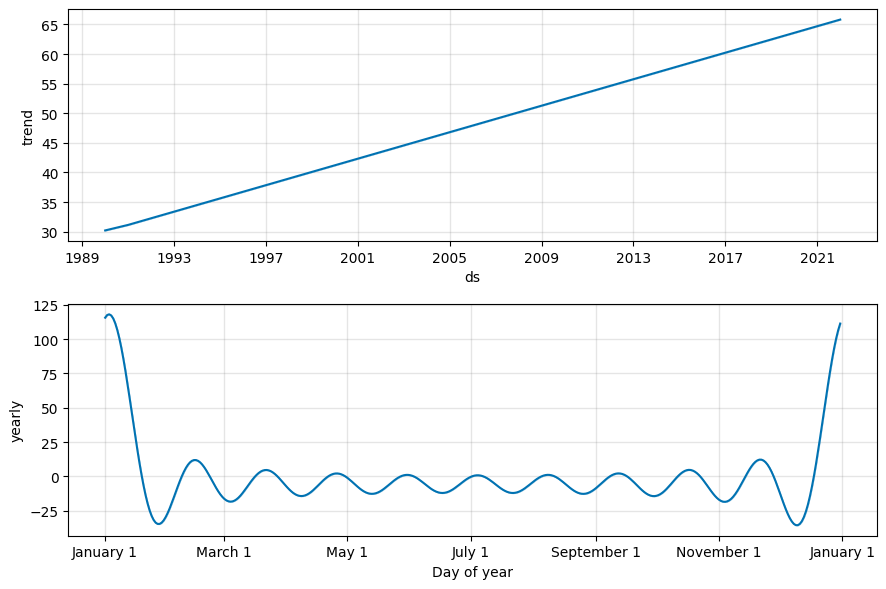

In [39]:
fig2 = m.plot_components(forecast)

In this desplayed result left columns are indexes, the length is same as test set, and right column are the predicted values